This sheet is used to generate the graphs for the result section; the input data is generated by feature_experiments.py

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
sns.set(font_scale=1.5,style="whitegrid")
#sns.set_context("paper")


In [2]:
def prep_df(file,classes):
    df = pd.read_csv(file)
    df.feature.unique()
    df = df[df.feature.isin(['full_paths_original_8',
       'full_paths_original_16', 'full_paths_unrestricted_4',
       'full_paths_unrestricted_8', 'full_paths_unrestricted_16','middle_paths_original_4',
        'middle_paths_original_8', 'middle_paths_original_16',
        'middle_paths_unrestricted_4','middle_paths_unrestricted_8',
        ]) == False]
    df['feature'] = df.apply(lambda row: 'LexNet (original)' if row['feature'] == 'full_paths_original_4_aip' else row['feature'], axis=1)
    df['feature'] = df.apply(lambda row: 'LexNet (customized)' if row['feature'] == 'middle_paths_unrestricted_16' else row['feature'], axis=1)
    df['class'] = pd.Categorical(df['class'], classes)
    df['feature'] = pd.Categorical(df['feature'], ['InferSent', 'Bag-Of-Words', 'Word Embedding', 'LexNet (customized)',
                                              'POS n-grams', 'Contains JJR', 'LexNet (original)'])
    return df.sort_values(['class','feature'])

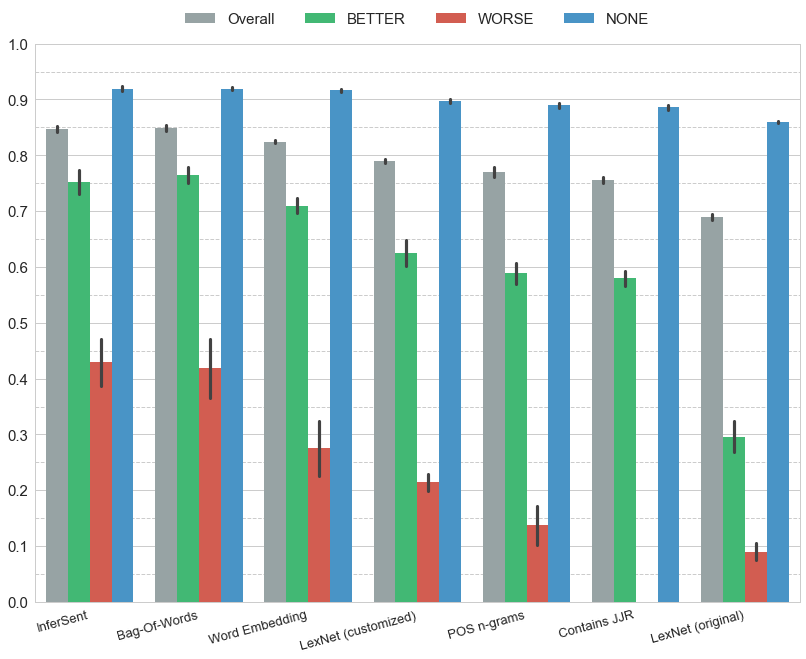

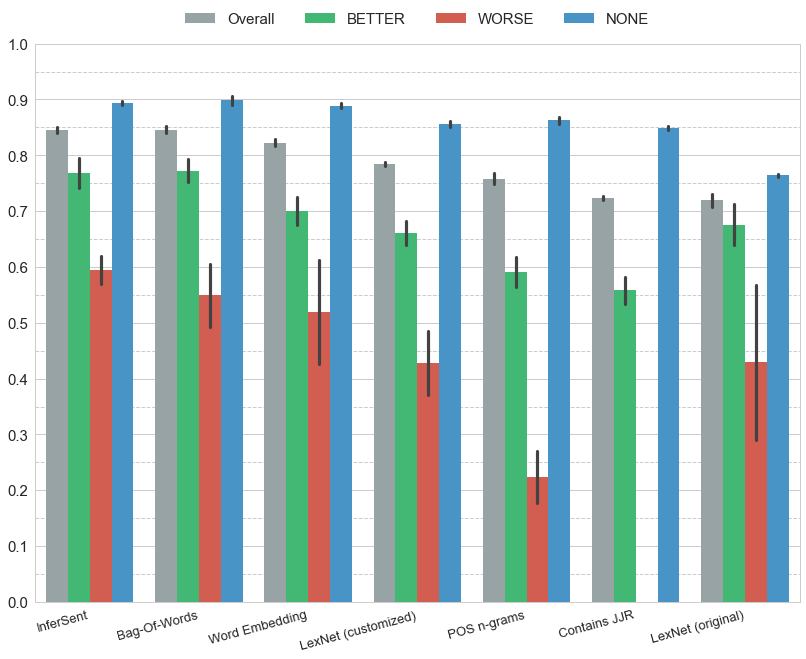

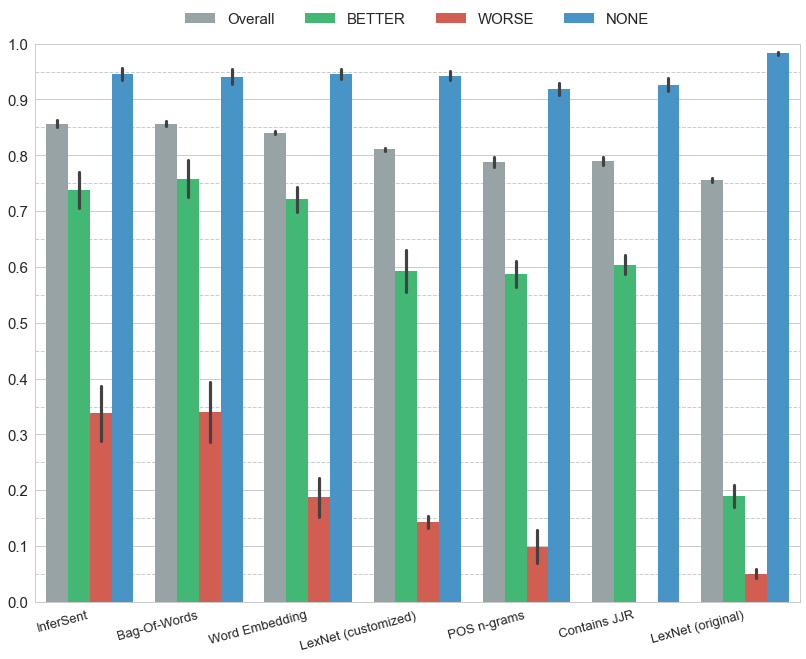

In [8]:

def plot(d, colors):
    flatui = colors
    pp = sns.color_palette(flatui)
    for p in ['f1','precision','recall']:
        pal = pp
        fig, ax = plt.subplots()
        fig.set_size_inches(13.7, 10.27)
        sns.barplot(x="feature", y=p, ci="sd",hue="class",palette=pal, data=d,dodge=True)
        plt.ylim(ymax = 1,ymin=0)
        plt.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, 1.08))
        #plt.title("recall")
        ax.set_yticks(np.arange(0.0, 1.1, 0.1))
        ax.set_yticks(np.arange(0.0, 1.05, 0.05),minor=True)
        ax.yaxis.grid(which='minor', linestyle='--')
        ax.yaxis.grid(which='major', linestyle='-')
        plt.xlabel('')
        plt.ylabel('')
        ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=15, ha='right', fontsize=13)
        fig.savefig("{}-{}.pdf".format(p,len(d['class'].unique()) == 3))


plot(prep_df('../../all_data_files/experiments/results_3_classes/graphic_data/results_False.csv',['Overall', 'BETTER', 'WORSE', 'NONE']),  ["#95a5a6", "#2ecc71","#e74c3c", "#3498db"])
#plot(prep_df('../graphics/data/heldout_results_True.csv',['Overall', 'ARG','NONE']),  ["#95a5a6", "#2ecc71","#3498db"])

In [4]:
a = np.array( np.random.rand(2,2)*1000, dtype=np.integer)

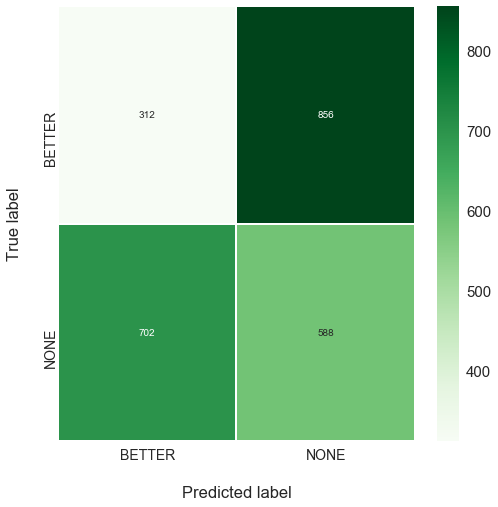

In [5]:
df_cm = pd.DataFrame(
        a, index=['BETTER','NONE'], columns=['BETTER','NONE'],)
fig = plt.figure(figsize=(8,8))
try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",linewidths=1,
                          cmap="Greens",cbar=True)
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=90, ha='center', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
heatmap.yaxis.set_label_coords(-0.1,0.5)
heatmap.xaxis.set_label_coords(0.5,-0.1)
fig.savefig("conf.pdf")

No handles with labels found to put in legend.


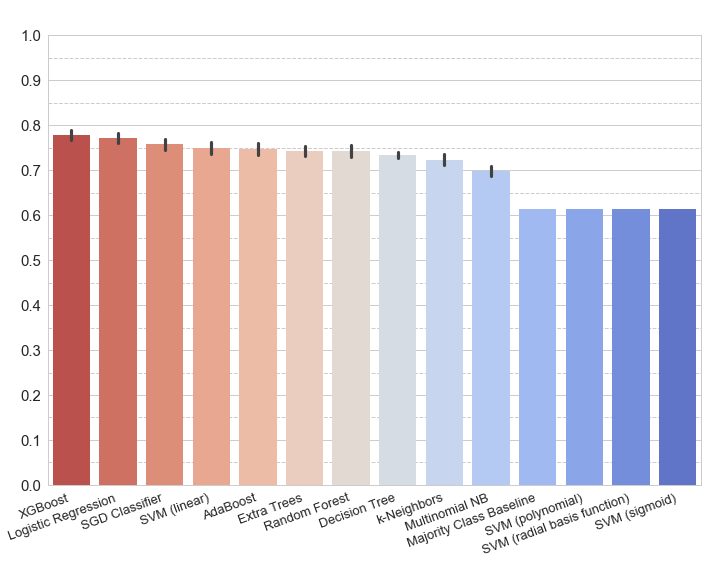

In [6]:
dd = pd.read_csv('classifier.csv')[['classifier','f1']]
dd['f1'] =  dd['f1'].apply(pd.to_numeric, errors='coerce')
pal = 'coolwarm_r'#sns.cubehelix_palette(14, start=2, rot=0.25,reverse=False)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x="classifier", y='f1', ci="sd",palette=pal,order=dd.groupby('classifier').mean().sort_values('f1',ascending=False).index.tolist(), data=dd,dodge=True)
plt.ylim(ymax = 1,ymin=0)
plt.legend(ncol=4,loc='upper center', bbox_to_anchor=(0.5, 1.08))
#plt.title("recall")
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticks(np.arange(0.0, 1.05, 0.05),minor=True)
ax.yaxis.grid(which='minor', linestyle='--')
ax.yaxis.grid(which='major', linestyle='-')
plt.xlabel('')
plt.ylabel('')
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=20, ha='right', fontsize=13)
fig.savefig("classifier.pdf")